<a href="https://colab.research.google.com/github/A-SHIVASAI/A-SHIVASAI/blob/main/Missing_Value1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What are the types of missing values?
1. MCAR: Missing Completely At Random, A variable is mssing completely at ramdom if the probability of being missing the same for all the observations. When data is MCAR, there is absolutely no ralationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be mssing than other.

2. Mssing Data Not At Random(MNAR): Systematic missing values: There is absolutely some relationship between the data mssing and any other values, observed or missing, within the dataset.

3. Missing At Random (MAR):  

### MCAR

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('titanic.csv')

In [29]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [30]:
df.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,174
sibsp,0
parch,0
ticket,0
fare,1
cabin,659


## MNAR

In [25]:
import numpy as np
import seaborn as sns

In [31]:
df['cabin_null'] = np.where(df.cabin.isnull(), 1, 0)

In [32]:
## find the percentage of nan values
(df.cabin_null == 1).mean()

0.7752941176470588

In [33]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'cabin_null'],
      dtype='object')

In [34]:
df.cabin_null[df.survived == 1].mean()

0.5942492012779552

In [35]:
df.cabin_null[df.survived == 0].mean()

0.8808193668528864

### MAR

In [ ]:
# Men ---> hide their salary
# Women ---> hide their age

### All the techniques of handling, missing values

1. Mean/ Median/ Mode replacement
2. Random Sample Imputation
3. Capturing Nan values with a new feature
4. End of Distribution Imputation
5. Arbitrary imputation
6. Frequent Category Imputation

### Mean/ Median/ Mode Imputation
When should we apply?
Mean/ median imputation has the assumption that the data are missing completely at random(MCAR)
We solve this by replacing the NaN with the most fequent occurace of the variables

In [36]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])

In [37]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [38]:
## percentage of missing values
df.isnull().mean()

,0
age,0.204706
fare,0.001176
survived,0.000000


In [39]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median)

In [40]:
impute_nan(df, 'age', df.age.median())
impute_nan(df, 'fare', df.fare.median())

In [41]:
df.head()

,age,fare,survived,age_median,fare_median
0,NaN,7.7333,1,28.0,7.7333
1,38.0,8.6625,0,38.0,8.6625
2,30.0,24.1500,0,30.0,24.1500
3,54.0,23.0000,1,54.0,23.0000
4,40.0,13.0000,0,40.0,13.0000


In [42]:
df[df.fare.isnull()]

,age,fare,survived,age_median,fare_median
416,60.5,NaN,0,60.5,14.1083


In [43]:
print(df.age.std())
print(df.age_median.std())

14.562243434125529
12.999022882894222


<ipython-input-44-5bb9bd39a48c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age_median)


<Axes: xlabel='age_median', ylabel='Density'>

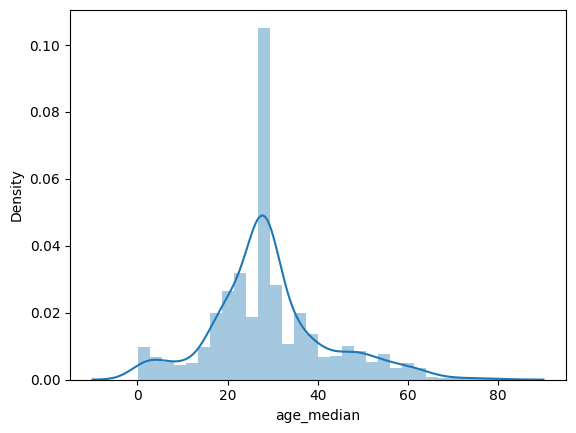

In [44]:
sns.distplot(df.age_median)

<ipython-input-45-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

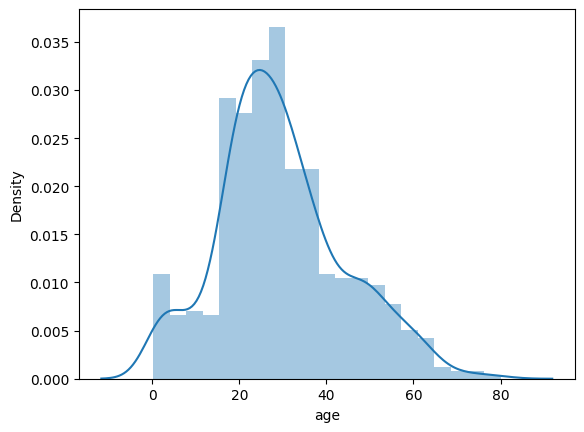

In [45]:
sns.distplot(df.age)

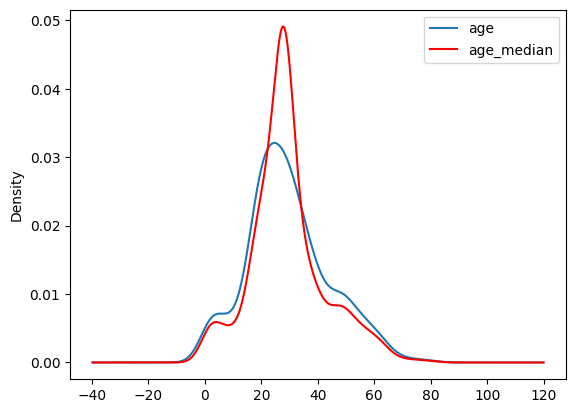

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
ax.legend()

## Advantages And Disadvantages of Mean Median Imputation

### Advantages
1. Easy to implement(Robust to Outliers)
2. Faster way to obtain the complete dataset

### Disadvantages
1. change and Distortion in the original data
2. It impacts correlation
